### Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics 
and delay causes i carrega’l a un Pandas Dataframe. 
Explora les dades que conté, explica breument quines variables hi ha 
i queda’t únicament amb les columnes que consideris rellevants. 
Justifica la teva elecció.



In [125]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/alexvalles/Desktop/Data Science/Curso Data Science Presencial/Sprint 3/DelayedFlights.csv')


df = df.sample(200000).copy()

# hago copy() para que futuros cambios en el dataframe no me alteren la estructura original
# del mismo

In [126]:
df.head().reset_index(drop=True)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,89494,2008,1,30,3,1643.0,1635,1748.0,1735,WN,...,4.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,3161474,2008,6,25,3,655.0,610,809.0,732,OH,...,10.0,13.0,0,N,0,37.0,0.0,0.0,0.0,0.0
2,1895585,2008,4,6,7,1812.0,1747,2030.0,2015,XE,...,8.0,14.0,0,N,0,2.0,0.0,0.0,0.0,13.0
3,3923927,2008,7,24,4,1745.0,1720,1928.0,1900,DL,...,4.0,32.0,0,N,0,25.0,0.0,3.0,0.0,0.0
4,3910997,2008,7,31,4,1815.0,1535,1958.0,1715,US,...,12.0,15.0,0,N,0,0.0,0.0,163.0,0.0,0.0


In [127]:
cancelado_si_no = df['Cancelled'].value_counts()

print(cancelado_si_no)

# Eliminaremos 'Cancelled' ya que hay pocos vuelos cancelados en proporción al total,
# y tampoco haremos estudio de los vuelos cancelados.

0    199934
1        66
Name: Cancelled, dtype: int64


In [128]:
codigo_cancelacion = df['CancellationCode'].value_counts()

print(codigo_cancelacion)

# Comprobamos sólo las causas/código de la cancelación, pero tras eliminar 'Cancelled'
# eliminamos también 'Cancellation code' del estudio

N    199934
B        35
A        25
C         6
Name: CancellationCode, dtype: int64


In [129]:
desviado_si_no = df['Diverted'].value_counts()

print(desviado_si_no)

# vemos que tenemos 797 vuelos desviados en nuestro dataframe reducido, pero no 
# utilizaremos esta variable para nuestro estudio.


0    199203
1       797
Name: Diverted, dtype: int64


In [130]:
# Filtramos datos antes de eliminar las columnas/variables que no necesitaremos.

df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [131]:
df = df[[#'Unnamed: 0', 'Year', 'Month', 'DayofMonth', 
        'DayOfWeek', 'DepTime',
        #'CRSDepTime'#, 
        'ArrTime', #'CRSArrTime'#,
        'UniqueCarrier', 'FlightNum',
        'TailNum', #'ActualElapsedTime', 'CRSElapsedTime', 
        'AirTime', 'ArrDelay',
        'DepDelay', 'Origin', 'Dest', 'Distance', 
        #'TaxiIn', 'TaxiOut',
        #'Cancelled', 'CancellationCode', 'Diverted', 
        #'CarrierDelay',
        #'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]] 

# Para resumir, en verde quedan marcadas todas las variables que eliminamos del dataset.

In [132]:
df.head()

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
28767,3,1643.0,1748.0,WN,2612,N398SW,52.0,13.0,8.0,PDX,GEG,279
942229,3,655.0,809.0,OH,5309,N658CA,51.0,37.0,45.0,GSO,ATL,306
602861,7,1812.0,2030.0,XE,2502,N27152,176.0,15.0,25.0,IAD,IAH,1190
1174235,4,1745.0,1928.0,DL,768,N3745B,67.0,28.0,25.0,ATL,CMH,446
1170556,4,1815.0,1958.0,US,1178,N183UW,76.0,163.0,160.0,MCO,CLT,468


In [133]:
df.shape

(200000, 12)

El conjunto de datos proporciona información detallada sobre vuelos, retrasos y las causas de los retrasos, lo que lo hace útil para el análisis de la puntualidad de las aerolíneas y la gestión de retrasos en vuelos.


Para poder trabajar de manera óptima con el dataframe "Airlines Delay", reducimos su dimensión de manera aleatoria hasta los 200.000 registros. 


Inicialmente tenemos 30 variables/columnas en el dataframe, de las que podemos eliminar las menos relevantes para nuestros cálculos, y en este caso, nos quedaremos con 12 finalmente (la cantidad podría ser mayor o menor dependiendo de los diferentes estudios que queramos realizar).

Las variables que serán eliminadas del análisis, son las siguientes:

'Unnamed: 0', 'Year', 'Month', 'DayofMonth',  'CRSDepTime', , 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'TaxiOut',
'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'

'Unnamed' es irrelevante (ya tenemos un índice de referencia)
'Year': los datos son todos para el año 2008, se puede eliminar.
'Month', 'DayofMonth': para el análisis a realizar no las necesitaremos, el día de la semana ya es suficiente. Si hiciéramos un estudio de retrasos mensuales, podríamos utilizar la variable 'Month', por ejemplo.
'CRSDepTime', 'CRSArrTime','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay': estas variables ya se tienen en cuenta para calcular el 'DepDelay' y 'ArrDelay'.
'Cancelled': De 200.000 vuelos en nuestro dataframe, solo 66 fueron cancelados. No es demasiado relevante y eliminaremos esta variable de nuestro estudio. Consecuentemente, eliminaremos también 'Cancellation Code'.
Diverted: Tenemos una cifra de 797 vuelos desviados (sobre 200.000 vuelos). Por supuesto que lo tenemos en cuenta, pero lo eliminaremos de nuestro dataframe depurado.  

### Exercici 2: Fes un informe complet del dataset:

a) Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.

In [134]:
df.describe()

,DayOfWeek,DepTime,ArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance
count,200000.000000,200000.000000,199260.000000,200000.000000,199137.000000,199137.000000,200000.000000,200000.000000
mean,3.977255,1517.963645,1610.177733,2177.408655,108.169717,42.041143,42.985840,764.577890
std,1.997310,450.546071,547.533354,1937.584675,68.615876,56.402617,52.980412,573.575696
min,1.000000,1.000000,1.000000,1.000000,1.000000,-69.000000,6.000000,11.000000
25%,2.000000,1204.000000,1316.000000,610.000000,58.000000,9.000000,12.000000,338.000000
50%,4.000000,1545.000000,1715.000000,1542.000000,90.000000,24.000000,24.000000,606.000000
75%,6.000000,1900.000000,2030.000000,3407.000000,137.000000,56.000000,53.000000,997.000000
max,7.000000,2400.000000,2400.000000,9741.000000,642.000000,1350.000000,1348.000000,4962.000000


Con describe() obtenemos una tabla estadística que proporciona información sobre la distribución de los datos en las columnas.

Para el año 2018 podemos, entre otras, extraer las siguientes conclusiones:

- Day of the week: Vemos que el 25% de los vuelos han operado en martes o antes (lunes), el 75% de los vuelos ha operado en sábado o antes y el 50% de los vuelos (mediana) así como la media se efectuaron los jueves.

- Departure Time: Vemos que el 75% de los vuelos salen antes de las 19:00 horas, con hora máx de salida a las 24 horas.

- Arrival Time: El 75% de los vuelos llegan igual o antes de las 20:30 horas. El 25% restante llegan más tarde de esa hora.

- Air Time: La media de duración de vuelo es 108 min, la duración del 50% de los vuelos es de 90 min, y con un máximo de 642 min (Destino Honolulu). También si miramos la desviación estándar de 68 minutos sugiere que los retrasos en las llegadas varían considerablemente en torno al valor promedio. Algunos retrasos pueden ser significativamente mayores que la media, mientras que otros pueden ser significativamente menores. 

- Arr Delay: la media de tiempo en los retrasos en las llegadas es de 56 min, estando igual o por debajo de ese mismo tiempo (56 min) el 75% de las veces.

- Dep Delay: la media de tiempo de los retrasos en las salidas es de casi 43 min. 

- Distance: la distancia media de los vuelos operados es de 764.57 millas, el 50% (mediana) de 606 millas. El vuelo más largo es de 4962 millas. El vuelo más corto es de 11 millas.

b) Troba quantes dades faltants hi ha per columna.

In [135]:
df.isnull().sum()

DayOfWeek          0
DepTime            0
ArrTime          740
UniqueCarrier      0
FlightNum          0
TailNum            0
AirTime          863
ArrDelay         863
DepDelay           0
Origin             0
Dest               0
Distance           0
dtype: int64

In [136]:
# Para rellenar los valores vacíos, utilizamos en este caso la media de cada columna

df.fillna({'ArrTime': df['ArrTime'].mean()},inplace = True)

df.fillna({'ArrDelay': df['ArrDelay'].mean()},inplace = True)

df.fillna({'AirTime': df['AirTime'].mean()},inplace = True)


In [137]:
missing_data = df.isnull().sum()

print(missing_data)  

#comprobamos que no faltan datos

# Nota: TailNum al ejecutar todas las celdas, suele ser 0 pero a veces
# cambia a 1 ó 2 como en este caso. De todas formas no afecta al estudio.

DayOfWeek        0
DepTime          0
ArrTime          0
UniqueCarrier    0
FlightNum        0
TailNum          0
AirTime          0
ArrDelay         0
DepDelay         0
Origin           0
Dest             0
Distance         0
dtype: int64


In [138]:
df.loc[df.duplicated()]  # vemos que no hay filas duplicadas

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance


c) Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).

In [139]:
# Añadir una nueva columna: Velocidad media vuelo

df['AverageSpeed'] = df['Distance'] / df['AirTime']

In [140]:
# Creamos una nueva columna 'ArrivalDelay' para saber si ha habido retraso en la llegada o no.

df['ArrivalDelay'] = df['ArrDelay'].apply(lambda x: 'Yes' if x > 0  else 'No')

In [141]:
df.head(15).reset_index(drop=True)

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,AverageSpeed,ArrivalDelay
0,3,1643.0,1748.0,WN,2612,N398SW,52.0,13.0,8.0,PDX,GEG,279,5.365385,Yes
1,3,655.0,809.0,OH,5309,N658CA,51.0,37.0,45.0,GSO,ATL,306,6.000000,Yes
2,7,1812.0,2030.0,XE,2502,N27152,176.0,15.0,25.0,IAD,IAH,1190,6.761364,Yes
3,4,1745.0,1928.0,DL,768,N3745B,67.0,28.0,25.0,ATL,CMH,446,6.656716,Yes
4,4,1815.0,1958.0,US,1178,N183UW,76.0,163.0,160.0,MCO,CLT,468,6.157895,Yes
5,5,1027.0,1231.0,UA,381,N831UA,218.0,-16.0,7.0,ORD,SMF,1781,8.169725,No
6,1,1806.0,2013.0,AA,897,N5EDAA,161.0,58.0,46.0,MCO,DFW,984,6.111801,Yes
7,3,2038.0,2128.0,DL,1155,N373DA,90.0,25.0,33.0,SLC,SAN,626,6.955556,Yes
8,7,2054.0,19.0,XE,2822,N14916,99.0,87.0,74.0,IAH,GSP,838,8.464646,Yes
9,7,1311.0,1432.0,AA,1989,N562AA,187.0,27.0,41.0,DFW,SJC,1438,7.689840,Yes


In [142]:
df.describe()

,DayOfWeek,DepTime,ArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance,AverageSpeed
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3.977255,1517.963645,1610.177733,2177.408655,108.169717,42.041143,42.985840,764.577890,6.626418
std,1.997310,450.546071,546.519474,1937.584675,68.467677,56.280796,52.980412,573.575696,2.307950
min,1.000000,1.000000,1.000000,1.000000,1.000000,-69.000000,6.000000,11.000000,0.286587
25%,2.000000,1204.000000,1317.000000,610.000000,58.000000,9.000000,12.000000,338.000000,5.864000
50%,4.000000,1545.000000,1714.000000,1542.000000,90.000000,25.000000,24.000000,606.000000,6.729167
75%,6.000000,1900.000000,2029.000000,3407.000000,137.000000,55.000000,53.000000,997.000000,7.466227
max,7.000000,2400.000000,2400.000000,9741.000000,642.000000,1350.000000,1348.000000,4962.000000,710.000000


d) Fes una taula de les aerolínies amb més endarreriments acumulats.

In [143]:
df['TotalDelay'] = df['DepDelay'] + df['ArrDelay']

# Agrupamos por aerolínea y sumamos los retrasos acumulados
airline_total_delays = df.groupby('UniqueCarrier')['TotalDelay'].sum().reset_index()

# Ordenamos el DataFrame por los retrasos acumulados en orden descendente
Total_delays = airline_total_delays.sort_values(by='TotalDelay', ascending=False)

print(Total_delays)

   UniqueCarrier    TotalDelay
17            WN  2.547504e+06
1             AA  1.860235e+06
15            UA  1.434265e+06
11            MQ  1.274476e+06
14            OO  1.201103e+06
18            XE  1.057176e+06
6             DL  9.123942e+05
5             CO  8.552460e+05
7             EV  8.084324e+05
19            YV  7.636213e+05
16            US  7.626471e+05
12            NW  6.706062e+05
4             B6  6.473006e+05
9             FL  6.446484e+05
13            OH  5.408460e+05
0             9E  5.031424e+05
3             AS  3.030322e+05
8             F9  1.655240e+05
10            HA  4.965908e+04
2             AQ  3.537000e+03


e) Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.

In [144]:
VuelosMasLargos = df[['TailNum','Origin', 'Dest', 'Distance']].sort_values(by='Distance', ascending=False)

VuelosMasLargos.head(100).reset_index(drop=True)

# El vuelo más largo es el que cubre el trayecto de Newark a Honolulu

,TailNum,Origin,Dest,Distance
0,N66051,EWR,HNL,4962
1,N69059,EWR,HNL,4962
2,N67058,EWR,HNL,4962
3,N68061,EWR,HNL,4962
4,N76064,HNL,EWR,4962
...,...,...,...,...
95,N349AA,ORD,HNL,4243
96,N212UA,HNL,ORD,4243
97,N395AA,HNL,ORD,4243
98,N210UA,ORD,HNL,4243


In [145]:
# Vuelos con más retrasos acumulados (se entiende que es el TotalDelay)


VuelosMasRetrasosAc= df[['TailNum', 'Origin', 'Dest', 'TotalDelay']].sort_values(by='TotalDelay', ascending=False)

VuelosMasRetrasosAc.head(100).reset_index(drop=True)

,TailNum,Origin,Dest,TotalDelay
0,N583NW,PDX,MSP,2698.0
1,N4WLAA,SLC,DFW,2586.0
2,N597UA,SEA,HNL,2535.0
3,N5ELAA,LAS,DFW,2465.0
4,N503AA,TUS,DFW,2369.0
...,...,...,...,...
95,N935FR,MKE,DEN,1192.0
96,N630DL,LAX,JFK,1189.0
97,N71411,LAS,CLE,1183.0
98,N563JB,PHX,JFK,1158.0


In [146]:
df.describe()

,DayOfWeek,DepTime,ArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance,AverageSpeed,TotalDelay
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3.977255,1517.963645,1610.177733,2177.408655,108.169717,42.041143,42.985840,764.577890,6.626418,85.026983
std,1.997310,450.546071,546.519474,1937.584675,68.467677,56.280796,52.980412,573.575696,2.307950,107.805396
min,1.000000,1.000000,1.000000,1.000000,1.000000,-69.000000,6.000000,11.000000,0.286587,-59.000000
25%,2.000000,1204.000000,1317.000000,610.000000,58.000000,9.000000,12.000000,338.000000,5.864000,22.000000
50%,4.000000,1545.000000,1714.000000,1542.000000,90.000000,25.000000,24.000000,606.000000,6.729167,49.000000
75%,6.000000,1900.000000,2029.000000,3407.000000,137.000000,55.000000,53.000000,997.000000,7.466227,108.000000
max,7.000000,2400.000000,2400.000000,9741.000000,642.000000,1350.000000,1348.000000,4962.000000,710.000000,2698.000000


<Axes: >

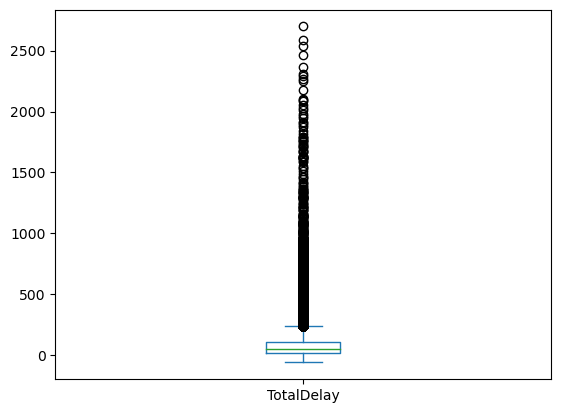

In [147]:
# Podemos hacer una representación gráfica del resultado anterior

df['TotalDelay'].plot(kind="box")

# Podemos ver gráficamente (en la caja) que la media de los retrasos acumulados se concentran en los
# 85 minutos, mientras que podemos observar los outliers con un máximo 
# de 2698 minutos de retraso acumulado. El 75% de los vuelos es igual o está por debajo
# de los 108 minutos de retraso acumulado.

f) Aporta allò que consideris rellevant

In [148]:
# Por ejemplo podemos buscar el día de la semana donde existen más retrasos


# Agrupamos por día de la semana y sumamos los retrasos acumulados
day_of_week_delay_totals = df.groupby('DayOfWeek')['TotalDelay'].sum().reset_index()

print("Retrasos acumulados para cada día de la semana: ")
print(day_of_week_delay_totals)

# Buscamos el día de la semana con más retrasos
day_with_most_delays = day_of_week_delay_totals.sort_values(by='TotalDelay', ascending=False).iloc[0]

print("Día de la semana con más retrasos:", day_with_most_delays['DayOfWeek'])

#observaremos que el día de la semana con más retrasos acumulados es el viernes (día 5)

Retrasos acumulados para cada día de la semana: 
   DayOfWeek    TotalDelay
0          1  2.542813e+06
1          2  2.380317e+06
2          3  2.195414e+06
3          4  2.481835e+06
4          5  2.901170e+06
5          6  1.843173e+06
6          7  2.660674e+06
Día de la semana con más retrasos: 5.0


In [149]:
# Ahora podríamos encontrar los 3 destinos más frecuentes


# Utilizamos la función 'value_counts' para contar la frecuencia de cada destino
dest_counts = df['Dest'].value_counts()

# Obtenemos los 3 destinos más frecuentes
top_3_destinations = dest_counts.head(3)

print("Los 3 destinos más frecuentes son:")
print(top_3_destinations)

Los 3 destinos más frecuentes son:
ATL    11215
ORD    11162
DFW     7337
Name: Dest, dtype: int64


In [150]:
# También podríamos ver los destinos con tiempo de vuelo más largo (por supuesto 
# coincide con vuelos de mayor distancia (Honolulu) ya definidos anteriormente)


longest_airtime_dest = df.sort_values(by='AirTime', ascending=False).reset_index()

print(longest_airtime_dest[['Origin', 'Dest', 'AirTime']].head())

  Origin Dest  AirTime
0    EWR  HNL    642.0
1    EWR  HNL    639.0
2    EWR  HNL    631.0
3    EWR  HNL    630.0
4    EWR  HNL    628.0


In [151]:
# aerolínea con la mayor cantidad de vuelos.

vuelos_por_aerolinea = df['UniqueCarrier'].value_counts()

print(vuelos_por_aerolinea)

WN    39181
AA    19881
UA    14660
MQ    14605
OO    13498
DL    11825
XE    10697
CO    10242
US    10234
EV     8458
NW     8117
FL     7420
YV     6868
B6     5779
OH     5448
9E     5361
AS     4007
F9     2881
HA      768
AQ       70
Name: UniqueCarrier, dtype: int64


In [152]:
# También podemos mirar qué avión opera más vuelos.

vuelos_por_avion = df['TailNum'].value_counts()

print(vuelos_por_avion)

N676SW    116
N340LV    105
N329SW    105
N304SW    102
N502SW    101
         ... 
N78008      1
N820NW      1
N7ACAA      1
N204UA      1
N181DN      1
Name: TailNum, Length: 5262, dtype: int64


In [153]:
# Podríamos hacer un estudio de la correlación entre la distancia y el tiempo de vuelo. 
# Siendo ésta cercana a 1 (0.9773), vemos que hay una gran correlación entre las variables,
# la cual es lógica ya que a mayor distancia, habrá una mayor duración del vuelo.

df['Distance'].corr(df['AirTime'])

0.97700374334555

### Exercici 3: Exporta el dataset net i amb les noves columnes a Excel.

In [154]:
df.to_excel('/Users/alexvalles/M3T02.xlsx', sheet_name='New_dataset')